In [1]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt(open('.\machine-learning-exercise-master\coursera-machine-learning-python\ex2\ex2data1.txt','r'),delimiter=',')
X=data[:,0:2]
y=data[:,2]

In [2]:
def plot_data(X,y):
    pos=np.argwhere(y==1)
    neg=np.argwhere(y==0)
    plt.plot(X[pos,0],X[pos,1],linestyle='',marker='+',color='k')
    plt.plot(X[neg,0],X[neg,1],linestyle='',marker='o',color='y')

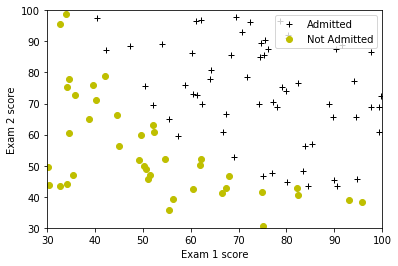

In [3]:
plt.figure()
plot_data(X,y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.xlim([30,100])
plt.ylim([30,100])
plt.legend(['Admitted','Not Admitted'],loc='upper right',numpoints=1)
plt.show()

In [4]:
m,n=X.shape
X=np.hstack((np.ones((m,1)),X))
theta=np.zeros(n+1)

In [5]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [6]:
def cost_function(theta,X,y):
    m,n=X.shape
    x_dot_theta=X.dot(theta)
    J=1.0/m*(-y.T.dot(np.log(sigmoid(x_dot_theta)))-(1-y).T.dot(np.log(1-sigmoid(x_dot_theta))))
    grad=1.0/m*(sigmoid(x_dot_theta)-y).T.dot(X)
    return J,grad

In [7]:
cost,grad=cost_function(theta,X,y)
print(cost)
print(grad)

0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]


In [8]:
import scipy.optimize as opt
theta,nfeval,rc=opt.fmin_tnc(func=cost_function,x0=theta,args=(X,y))
cost,_=cost_function(theta,X,y)
print(cost)
print(theta)

0.20349770158947483
[-25.16131856   0.20623159   0.20147149]


In [9]:
def map_feature(X1,X2):
    degree=6
    out=np.ones(len(X1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            tmp=np.power(X1,i-j)*np.power(X2,j)
            out=np.vstack((out,tmp))
    return out.T

In [10]:
def plot_decision_boundary(theta, X, y):
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s
        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

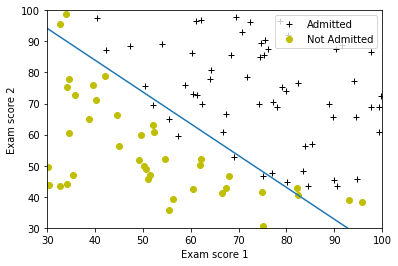

In [11]:
plt.figure()
plot_data(X[:,1:],y)
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.xlim([30,100])
plt.ylim([30,100])
plt.legend(['Admitted','Not Admitted'],loc='upper right',numpoints=1)
plot_decision_boundary(theta,X,y)
plt.show()

In [12]:
prob=sigmoid(np.dot(np.array([1,45,85]),theta))
print(prob)

0.7762906230410483


In [13]:
def predict(theta,X):
    p=sigmoid(X.dot(theta))>=0.5
    return p.astype(int)

In [14]:
p=predict(theta,X)
print(np.mean(p==y)*100)

89.0
